# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./pierce_county_house_sales.csv')
df.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [42]:
df_sorted = df.sort_values('house_square_feet', ascending=True)

df_sorted

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
1506,2020-01-27,1086000,1,0,384,440,0,0,Electric Baseboard,Masonry Concrete Block,Drywall,1,Built Up Rock,1966,0,1,NaN,View Avg +,SEWER/SEPTIC INSTALLED
4756,2020-05-15,105000,200,0,0,0,0,0,Electric Baseboard,Pine Finished Cabin,Drywall,1,Formed Seam Metal,2018,1,1,NaN,NaN,SEWER/SEPTIC NO
12530,2020-10-08,895000,216,0,0,0,0,0,Electric Baseboard,Finished Cottage,Drywall,1,Composition Shingle,1920,0,1,WF Salt,NaN,SEWER/SEPTIC INSTALLED
3511,2020-04-13,799500,216,0,0,0,0,1,No Heat,Unfinished Cottage,Paneling,1,Formed Seam Metal,1985,0,0,NaN,NaN,SEWER/SEPTIC AVAIL
7720,2020-07-14,230000,238,0,0,0,0,1,No Heat,Finished Cottage,Paneling,1,Formed Seam Metal,1915,1,1,WF Stream/Creek,NaN,SEWER/SEPTIC INSTALLED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2020-01-06,1350000,6542,0,0,1557,1692,3,Heat Pump,Frame Siding,Drywall,2,Composition Shingle,2007,5,4,NaN,NaN,SEWER/SEPTIC INSTALLED
9439,2020-08-19,1000000,6963,0,2828,1100,0,2,Forced Air,Frame Siding,Drywall,2,Concrete Tile,1987,5,6,WF Lake,NaN,SEWER/SEPTIC INSTALLED
16763,2020-12-29,1850000,7296,0,328,1120,0,4,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,2004,4,5,NaN,NaN,SEWER/SEPTIC INSTALLED
7060,2020-07-06,2273000,7725,0,0,1960,0,4,Heat Pump,Frame Stucco,Drywall,2,Concrete Tile,2006,3,4,WF Salt,NaN,SEWER/SEPTIC INSTALLED


In [43]:
df = df.drop(['attic_finished_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 'detached_garage_square_feet', 'view_quality', 'waterfront_type', 'utility_sewer', 'roof_cover'], axis=1)

In [44]:
df = df[df['house_square_feet'] != 1]

In [45]:
df['age'] = 2024 - df['year_built']

In [46]:
df.head()

,sale_date,sale_price,house_square_feet,fireplaces,hvac_description,exterior,interior,stories,year_built,bedrooms,bathrooms,age
0,2020-01-02,380000,2157,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,1993,3,3,31
1,2020-01-02,383000,2238,0,Forced Air,Frame Siding,Drywall,2,2017,4,3,7
2,2020-01-01,419900,1452,1,Forced Air,Frame Siding,Drywall,1,1965,3,2,59
3,2020-01-02,251660,832,0,Forced Air,Frame Vinyl,Drywall,1,1919,2,1,105
4,2020-01-02,500000,1780,1,Forced Air,Frame Siding,Drywall,1,1955,3,2,69


In [47]:
df.loc[:,['sale_price','exterior'] ].groupby('exterior').describe()

sale_price                                         \
                            count           mean           std       min   
exterior                                                                   
Cedar A-Frame                 2.0  159500.000000  1.343503e+04  150000.0   
Cedar Finished Cabin          5.0  282000.000000  1.444645e+05  100000.0   
Cedar Unfinished Cabin        2.0  345000.000000  3.676955e+05   85000.0   
Finished Cottage             41.0  450446.951220  4.060432e+05   12510.0   
Frame Hardboard              11.0  359136.363636  1.148260e+05  145000.0   
Frame Rustic Log             21.0  907616.666667  1.221504e+06  275000.0   
Frame Siding              14577.0  465530.793922  2.232354e+05    2000.0   
Frame Stucco                156.0  742889.480769  4.914581e+05  199856.0   
Frame Vinyl                1724.0  382791.296404  1.105853e+05   31500.0   
Log                          12.0  938382.166667  1.649118e+06   42086.0   
Masonry Common Brick        208.0  548645.841346  4.140107e+05   52924.0   
Masonry Concrete Block       42.0  317874.976190  9.534846e+04   63365.0   
Pine A-Frame                  1.0   75000.000000           NaN   75000.0   
Pine Finished Cabin           4.0  666250.000000  3.952294e+05  105000.0   
Pine Unfinished Cabin         2.0  255000.000000  7.071068e+03  250000.0   
Unfinished Cottage            4.0  503000.000000  2.914164e+05  210000.0   

                                                                 
                             25%       50%       75%        max  
exterior                                                         
Cedar A-Frame           154750.0  159500.0  164250.0   169000.0  
Cedar Finished Cabin    265000.0  265000.0  275000.0   505000.0  
Cedar Unfinished Cabin  215000.0  345000.0  475000.0   605000.0  
Finished Cottage        220000.0  350000.0  525000.0  1850000.0  
Frame Hardboard         315500.0  376000.0  447500.0   500000.0  
Frame Rustic Log        452450.0  659000.0  865000.0  6130000.0  
Frame Siding            350000.0  420000.0  530580.0  6090000.0  
Frame Stucco            380750.0  655000.0  923750.0  3500000.0  
Frame Vinyl             324712.5  380000.0  432612.5  1225000.0  
Log                     431250.0  484000.0  592500.0  6130000.0  
Masonry Common Brick    377250.0  450000.0  635200.0  4126500.0  
Masonry Concrete Block  284000.0  320000.0  367250.0   571000.0  
Pine A-Frame             75000.0   75000.0   75000.0    75000.0  
Pine Finished Cabin     577500.0  765000.0  853750.0  1030000.0  
Pine Unfinished Cabin   252500.0  255000.0  257500.0   260000.0  
Unfinished Cottage      277500.0  501250.0  726750.0   799500.0

In [48]:
df.loc[:,['sale_price','interior'] ].groupby('interior').describe()

sale_price                                                   \
              count           mean            std      min       25%   
interior                                                               
Drywall     16776.0  461027.389247  234087.563396   2000.0  348000.0   
Paneling       30.0  431810.000000  277638.411586  25000.0  202500.0   

                                         
               50%       75%        max  
interior                                 
Drywall   416500.0  523000.0  6130000.0  
Paneling  395000.0  638000.0  1030000.0

based on this analysis I can drop several cases that dont use a typical exterior. Any house with less than 40 cases is unlikely to be useful for analysis.

In [49]:
exterior_to_drop = ["Cedar A-Frame", "Cedar Finished Cabin", "Cedar Unfinished Cabin", "Frame Hardboard", "Frame Rustic Log", "Log", "Pine A-Frame", "Pine Finished Cabin", "Pine Unfinished Cabin", "Unfinished Cottage"]
df = df[~df.exterior.isin(exterior_to_drop)]

In [50]:
df.loc[:,['sale_price','exterior'] ].groupby('exterior').describe()

sale_price                                          \
                            count           mean            std       min   
exterior                                                                    
Finished Cottage             41.0  450446.951220  406043.240938   12510.0   
Frame Siding              14577.0  465530.793922  223235.419817    2000.0   
Frame Stucco                156.0  742889.480769  491458.058573  199856.0   
Frame Vinyl                1724.0  382791.296404  110585.334556   31500.0   
Masonry Common Brick        208.0  548645.841346  414010.717464   52924.0   
Masonry Concrete Block       42.0  317874.976190   95348.455010   63365.0   

                                                                 
                             25%       50%       75%        max  
exterior                                                         
Finished Cottage        220000.0  350000.0  525000.0  1850000.0  
Frame Siding            350000.0  420000.0  530580.0  6090000.0  
Frame Stucco            380750.0  655000.0  923750.0  3500000.0  
Frame Vinyl             324712.5  380000.0  432612.5  1225000.0  
Masonry Common Brick    377250.0  450000.0  635200.0  4126500.0  
Masonry Concrete Block  284000.0  320000.0  367250.0   571000.0

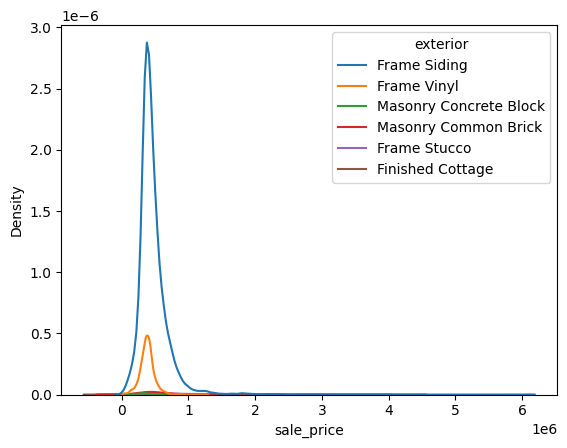

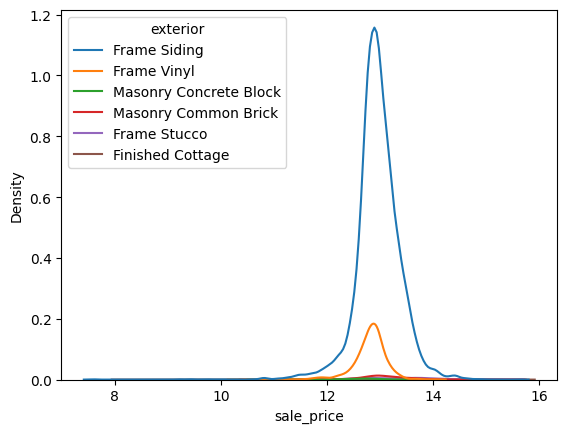

In [51]:
sns.kdeplot(x=df['sale_price'], hue=df['exterior'])
plt.show()

sns.kdeplot(x=np.log(df['sale_price']), hue=df['exterior'])
plt.show()

In [52]:
dropframe = df[~df.exterior.isin(["Frame Siding", "Frame Vinyl"])]

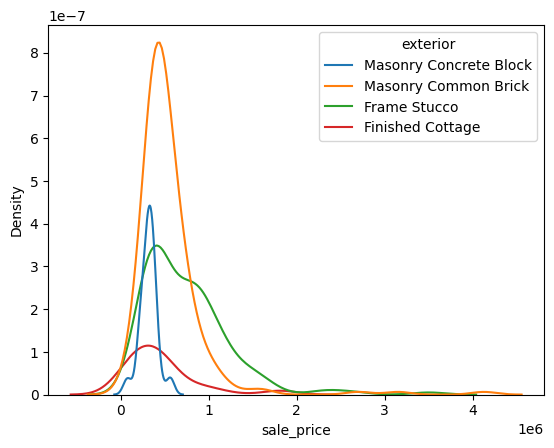

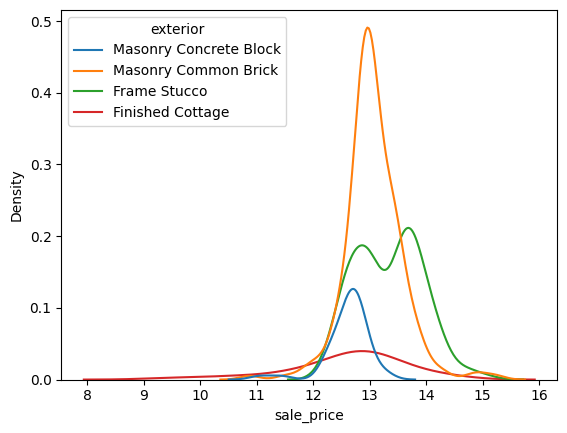

In [53]:
sns.kdeplot(x=dropframe['sale_price'], hue=dropframe['exterior'])
plt.show()

sns.kdeplot(x=np.log(dropframe['sale_price']), hue=dropframe['exterior'])
plt.show()

<Axes: xlabel='house_square_feet', ylabel='sale_price'>

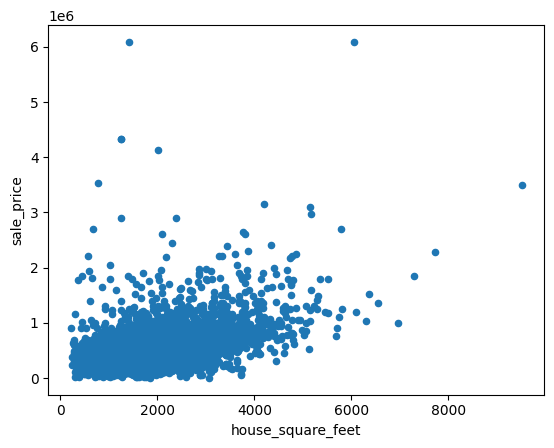

In [54]:
df.plot.scatter(x = 'house_square_feet',y = 'sale_price')

#3


In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['sale_price']
X = df.loc[:,['house_square_feet', 'exterior'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['house_square_feet'],
                     pd.get_dummies(X_train['exterior'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['house_square_feet'],
                    pd.get_dummies(X_test['exterior'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.2990707955072963
RMSE:  211999.69427450353


,variable,coefficient
0,house_square_feet,161.338796
1,Finished Cottage,332950.075123
2,Frame Siding,157591.540888
3,Frame Stucco,323028.779465
4,Frame Vinyl,93805.761646
5,Masonry Common Brick,278288.730230
6,Masonry Concrete Block,140785.809231


#4


In [56]:
# Randomize the rows in the dataframe:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['sale_price']

df_test = df[train_size:]
y_test = df_test['sale_price']

# So the first 0:train_size rows are my training data, and train_size: are my test data.

In [57]:
from sklearn import linear_model

var_n = ['age','house_square_feet','stories'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.26178109927098336
Numeric only RMSE:  191023.8602244549


In [58]:
from sklearn import linear_model

var_n = ['age'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.054291432737869516
Numeric only RMSE:  216208.96539921116


In [59]:
from sklearn import linear_model

var_n = ['house_square_feet'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.24235531945347055
Numeric only RMSE:  193520.87816297493


In [60]:
from sklearn import linear_model

var_n = ['stories'] # Select variables
X_train_n = df_train.loc[:,var_n] # Process training covariates
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) # Run regression
X_test_n = df_test.loc[:,var_n] # Process test covariates
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.02394005169404645
Numeric only RMSE:  219651.04969071035


square feet is the best predictor by far, age is bad but stories is worse

#5